Dataset saved as 'housing_data.csv'
Missing values in dataset:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64
Mean Squared Error (Train): 0.5234413607125448
Mean Squared Error (Test): 0.5289841670367214


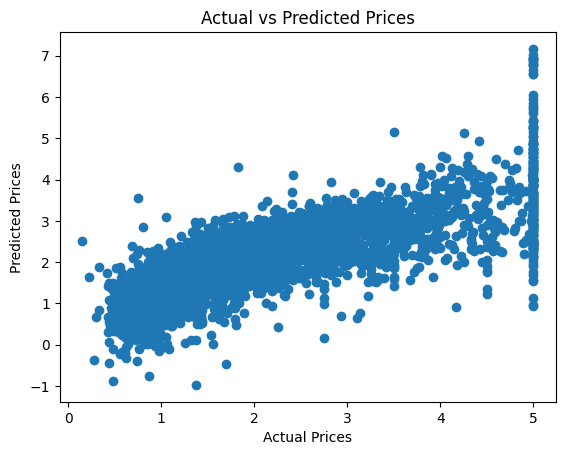

In [6]:
# Step 1: Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing  # Alternative dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Step 2: Load the California Housing dataset (since load_boston is deprecated)
boston = fetch_california_housing()
data = pd.DataFrame(boston.data, columns=boston.feature_names)

# Step 3: Add the target variable
data['PRICE'] = boston.target

# Step 4: Save dataset to CSV file
data.to_csv("housing_data.csv", index=False)
print("Dataset saved as 'housing_data.csv'")

# Step 5: Check for missing values
print("Missing values in dataset:\n", data.isnull().sum())

# Step 6: Split independent and dependent variables
x = data.drop(['PRICE'], axis=1)
y = data['PRICE']

# Step 7: Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

# Step 8: Train the model using Linear Regression
lm = LinearRegression()
model = lm.fit(xtrain, ytrain)

# Step 9: Predict on training and testing data
ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest)

# Step 10: Evaluate the model performance
train_mse = mean_squared_error(ytrain, ytrain_pred)
test_mse = mean_squared_error(ytest, ytest_pred)

print("Mean Squared Error (Train):", train_mse)
print("Mean Squared Error (Test):", test_mse)

# Step 11: Visualizing the predictions (Optional)
plt.scatter(ytest, ytest_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


Slope (m): 0.6438356164383547
Intercept (b): 26.78082191780829


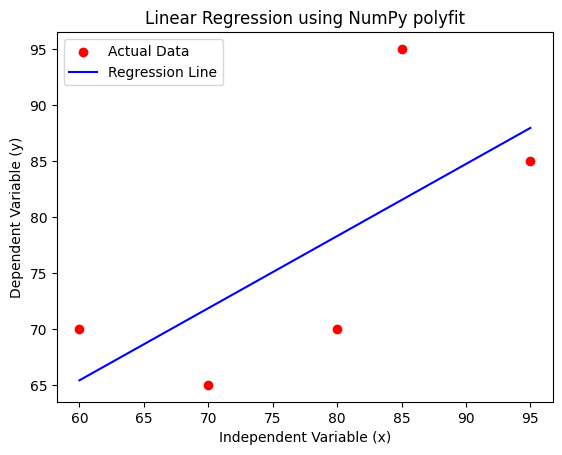

In [7]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Create data arrays (independent variable x and dependent variable y)
x = np.array([95, 85, 80, 70, 60])
y = np.array([85, 95, 70, 65, 70])

# Step 3: Create a Linear Regression Model using NumPy's polyfit function
model = np.polyfit(x, y, 1)  # 1 means a linear model (degree = 1)

# Step 4: Observe the coefficients of the model
print("Slope (m):", model[0])  # Coefficient of x
print("Intercept (b):", model[1])  # Constant term

# Step 5: Generate predicted values for visualization
y_pred = np.polyval(model, x)

# Step 6: Plot the original data and regression line
plt.scatter(x, y, color='red', label="Actual Data")  # Scatter plot of actual data
plt.plot(x, y_pred, color='blue', label="Regression Line")  # Regression line
plt.xlabel("Independent Variable (x)")
plt.ylabel("Dependent Variable (y)")
plt.title("Linear Regression using NumPy polyfit")
plt.legend()
plt.show()
